In [ ]:
%pip install gdown

In [ ]:
!gdown https://drive.google.com/drive/folders/1XLLR97Pc1uriSjJV7yZ5lgkC_IVZDV_g?usp=sharing -O ./data --folder

# Data Preparation

မင်္ဂလာပါ၊ ဒီနေ့ လက်တွေ့ လုပ်ရမှာကတော့ Myanmar Digit Project -- Part 1 အဖြစ် Data Collection, Data Cleaning နဲ့ Data Labelling အလုပ်များပဲ ဖြစ်ပါတယ်။ 

**What is the most important ingredient in a Data Science project ?**

* Data Science project တခုမှာ အရေးအကြီးဆုံးကတော့ Data ပဲ ဖြစ်ပါတယ်။ 

လက်တွေ့ဘဝမှာ `datasets.load_my_data()` လို့ ခေါ်သုံးလို့မရတဲ့အတွက် Data ကို collect အရင် လုပ်ရပါမယ်။ 

collect ကောက်ထားပြီးသား မရှိဘူးဆိုခဲ့ရင်တော့ Data ကို ကိုယ်တိုင် ကောက်ရပါမယ်။ 

*Myanmar Digit Project* ဟာ MNIST project လိုပဲ ဗမာ ဂဏန်း ၀ (သုည) ကနေ ၉ (ကိုး) အထိကို classification လုပ်မဲ့ project ဖြစ်ပါတယ်။

**So, what kind of data are we collecting ?**

* မြန်မာဂဏန်း ၀ (သုည) ကနေ ၉ (ကိုး) အထိ ရေးထားတဲ့ လက်ရေး စာလုံးတွေကို ကောက်ရမှာ ဖြစ်ပါတယ်။ 

## Step 1 - Digitization

ပထမဆုံး အဆင့်အဖြစ် စာရွက်နဲ့ ရေးထားတဲ့ ဂဏန်းတွေကို အရင်ဆုံး digitize လုပ်ရမှာ ဖြစ်ပါတယ်။

ဒီလိုလုပ်ရာမှာ ၃ မျိုး လုပ်ဆောင်နိုင်ပါတယ်။ 

1. Digital Pen နဲ့ user ကို ရေးသားစေခြင်း
2. user ရေးသားထားသော ဂဏန်းများကို Scanner နှင့် ဖတ်ခြင်းနှင့်
3. Microsoft Office Lens ကဲ့သို့ application များကို အသုံးပြု၍ Scan ဖတ်ခြင်းတို့ပဲ ဖြစ်ပါတယ်။ 

ဒီနေရာမှာ သတိပြုဖို့ကတော့ user convenient factor ဖြစ်ပါတယ်။ 

> ကွန်ပျူတာရှေ့မှာလာထိုင်ပြီး တခုရေး၊ တခါ save တာက user အဖို့ convenient မဖြစ်စေပါဘူး။ 
> 
> ဒါကြောင့် စာရွက်ပေါ်မှာ ဂဏန်းတွေကို ခပ်ကျဲကျဲလေး တန်းစီရေးထားတဲ့ ပုံစံကို အသုံးပြုပါမယ်။

ရေးထားတဲ့ စာရွက်တွေကို scanner ဖတ်ချင်ဖတ် ဒါမှမဟုတ် Microsoft Office Lens လိုမျိုး App နဲ့ scan ဖတ်ပြီး ကြိုတင်သဘောတူထားတဲ့ [Google Drive](https://drive.google.com/drive/folders/1XLLR97Pc1uriSjJV7yZ5lgkC_IVZDV_g?usp=sharing) သို့ upload လုပ်ပါ။

## Step 2 - Chopping up individual digits

ဒုတိယ အဆင့်အဖြစ် ရလာတဲ့ ဂဏန်းပုံတွေကို ဂဏန်းတခု ရုပ်ပုံတခုဖြစ်အောင် ဖြတ်တောက်ပါမယ်။ 

ဒီလို ဖြတ်တောက်ရာမှာ Photoshop, Gimp ကဲ့သို့သော software များကို အသုံးပြုပြီး ဖြတ်တောက်နိုင်ပါတယ်။

ဒီနေရာမှာ သတိပြုဖို့ကတော့ Data Professional ရဲ့ အချိန်ဖြစ်ပါတယ်။ 

> ကနဦး မြင်တွေ့ချက်တွေအရ scanner ဖတ်ထားတဲ့ file တခုမှာ ဂဏန်း 100 - 180 ကြား ပါဝင်နိုင်ပါတယ်။ 
>
> ဒီအခြေအနေနဲ့ manual crop လုပ်ပြီး save လုပ်မယ်ဆိုရင် အချိန် အတော်ကြာသွားမှာ ဖြစ်ပါတယ်။ 
> 
> ဒါကြောင့် Data Tool တွေ အသုံးပြုပြီး automatic crop, manual label and save method ကို သုံးမှာ ဖြစ်ပါတယ်။ 

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

import cv2
from PIL import Image, ImageOps

import numpy as np
from sklearn import cluster

### Step 2.1. Reading the image and conversion to grayscale

Image ကို ဖတ်ဖို့ Pillow library (`PIL`) ထဲက `Image.open` function ကို သုံးပါမယ်။

Image ကို grayscale ကို ပြောင်းဖို့ Pillow library (`PIL`) ထဲက `ImageOps.grayscale` function ကို သုံးပါမယ်။

* **Exercise** -- အားလုံးပြီးသွားတော့ ရလာတဲ့ image `im_sample_gray` ကို matplotlib နဲ့ ကြည့်ပါမယ်။

In [ ]:
# do something with plt to make image shown is 15 x 15 
with open("data/sample_grid.1.png", "rb") as f:
    im_sample = Image.open(f)
    im_sample_gray = ImageOps.grayscale(im_sample)
    # do something with plt, im_sample_gray to view the image on screen
    # plt.show()

### Step 2.2. Normalize the image 

image မှာ သုံးထားတဲ့ မှင် အမျိုးအစားနဲ့ စာရွက်သား ပေါ်မူတည်ပြီး image က imperfection တွေ ရှိနေတာကို မြင်ရမှာပါ။

Normalization ဆိုတာက imperfection တွေ လျော့သွားအောင်လို့ pixel value တွေကို 0.0 နဲ့ 1.0 ကြား ဖြစ်သွားအောင် ညှိပေးတဲ့ သဘောပါ။ 

$$f_{\text{normalize}}(p) = \frac{p - max(P)}{max(P) - min(P)}$$ 

where $p \in P$ ဆိုတဲ့ formula နဲ့ တွက်တယ်။

ပြီးရင် စာရေးထားတဲ့ နေရာ (အနက်) တွေကို non-zero ၊ စာမရေးထားတဲ့ စာရွက်သား (အဖြူ) တွေကို 0 ဖြစ်စေချင်တာမို့ normalized လုပ်ထားတဲ့ တန်ဖိုးကို 1.0 ထဲက နှုတ်ရပါမယ်။ 

$$f_{\text{color correct}} = 1.0 - P$$

အဲဒါ ၂ ခုကို ပေါင်းရေးတော့ ... 

$$f_{\text{normalize and correct}} = 1.0 - \frac{p - max(P)}{max(P) - min(P)}$$ 

လို့ရပါမယ်။ 

ပြီးတော့မှ ရလာတဲ့ pixel value တွေကို 255 နဲ့ ပြန်မြှောက်ခြင်းဖြင့် 0 နဲ့ 255 ကြား ပြန်ရောက်အောင် လုပ်ရမှာ ဖြစ်ပါတယ်။ 

* **Exercise** -- ဒီ normalization ကို `numpy` သုံးပြီး ရေးပါ။

In [ ]:
# rudimentary normalization 
np_sample_gray = np.array(im_sample_gray)
oh , ow = np_sample_gray.shape
np_sample_gray = # implement f_normalize_and_correct here
np_sample_gray = # and make the range between 0 to 255 instead of 0.0 to 1.0 in integer format

_ = plt.figure(figsize=(10, 10))
plt.imshow(np_sample_gray, cmap="gray")
plt.show()

### Step 2.3. Enhancing

အခု ရလာတဲ့ Image မှာ အနက်သားတွေက ဖြူလျော်လျော်၊ အဖြူရောင်စာလုံးတွေက သိပ်မထင်းတာကို တွေ့ရပါမယ်။ 

ဒါကြောင့် 64 ထက် နည်းတဲ့ pixel တွေကို 0 ၊ 255 - 64 = 191 ထက် များတဲ့ pixel တွေကို 255 ကို ပြောင်းပစ်ပါမယ်။ 

* **Exercise** -- ဒီ transformation ကို `numpy` သုံးပြီး ရေးပါ။

In [ ]:
# uncomment and fix the ???s
# np_sample_gray[???] = 0
# np_sample_gray[???] = 255

_ = plt.figure(figsize=(10, 10))
plt.imshow(np_sample_gray, cmap="gray")
plt.show()

### Step 2.4. Get points from Image

Image (2d data structure) ကနေ (x, y) --> value ကို ပြောင်းရတာ လွယ်ပေမဲ့ စာလုံး တလုံးချင်းမှာ ပါ**နိုင်**တဲ့ (x, y) coordinate တွေကို ဆွဲထုတ်ဖို့အတွက် MSER ဆိုတဲ့ method ကို သုံးရတယ်။ 

> MSER က well-studied method ဖြစ်တဲ့အပြင် သင်တန်းရဲ့ scope ထဲမှာလဲ မပါတာမို့ အသေးစိတ် မဆွေးနွေးတော့ပါ။ 

`detectRegions` function ထဲကို image တခု ထည့်လိုက်ရင် image ထဲက အရေးပါတဲ့ point coordinate တွေကို return ပြန်တယ်။

In [ ]:
# get the points (coordinates) likely to be in a digit
mser = cv2.MSER_create(10)
points, _ = mser.detectRegions(np_sample_gray)
points_X = np.concatenate([np.array(p) for p in points])
points_X.shape, len(points)

### 2.5. Grouping the points to get Bounding boxes and chopping up

နောက်တဆင့်အနေနဲ့ လုပ်ရမှာကတော့ clustering method တခုခုနဲ့ ရထားတဲ့ point `points_X` ကို တူရာ တူရာ စုပြီး bounding box ပြန်ရှာရမယ်။

* **Exercise** -- ဒီ နီးစပ်ရာ point တွေကို စုတဲ့ operation ကို ရေးပါ။

In [52]:
#dbscan = cluster.DBSCAN(eps=1.0, min_samples=15)
#ys = dbscan.fit_predict(points_X)
# get ys of k=??? groups
ys.min(), ys.max()

(0, 139)

In [53]:
def get_center(points_X, ys, cluster_id):
    selector = ys == cluster_id
    min_y, max_y =  points_X[selector, 1].min(), points_X[selector, 1].max()
    min_x, max_x, = points_X[selector, 0].min(), points_X[selector, 0].max()
    w, h = max_x - min_x, max_y - min_y
    cx, cy = min_x + w/2, min_y + h/2
    return cy, cx

def get_digit(np_sample, points_X, ys, cluster_id, width=256, height=256):
    cy, cx = get_center(points_X, ys, cluster_id)
    st_x, st_y = max(0, int(cx - width/2)), max(0, int(cy - height/2))
    en_x, en_y = min(np_sample.shape[1], st_x + width), min(np_sample.shape[0], st_y + height)
    return np_sample[st_y:en_y, st_x: en_x]
    
def show_digit(np_sample, points_X, ys, cluster_id, ax=plt, width=256, height=256):
    ax.imshow(get_digit(np_sample, points_X, ys, cluster_id, width=width, height=height), cmap="gray")

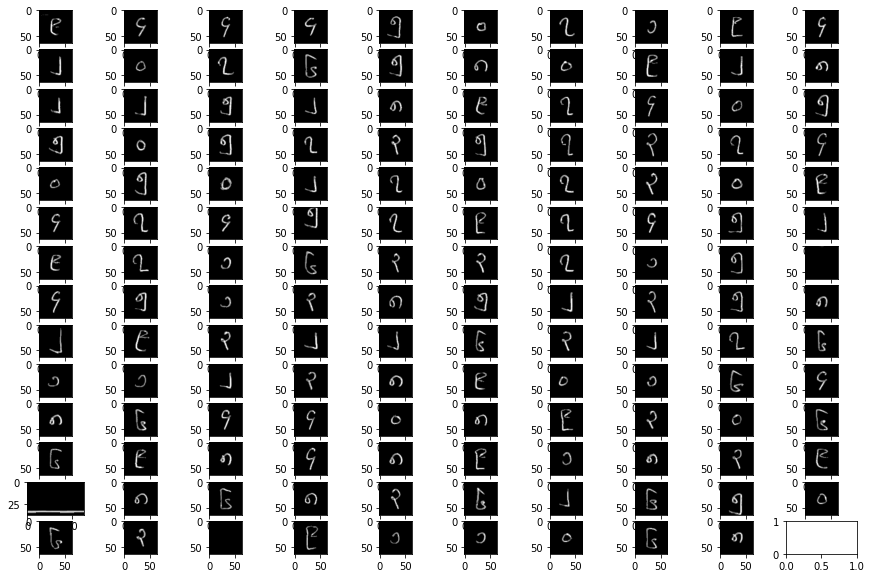

In [54]:
fig, axs = plt.subplots(14, 10, figsize=(15, 10))
id = 0
for r in axs:
    for ax in r:
        show_digit(np_sample_gray, points_X, ys, id , ax=ax, width=64, height=64)
        id = id + 1
        if id >= ys.max():
            break
        
plt.show()

## Step 3 - Manual Labelling

ဒီ အဆင့်ကတော့ အပေါ်ပုံရဲ့ အနေအထားကို ကြည့်ပြီး အောက်မှာ `labels` ထဲကို manually ရိုက်ထည့်ရမှာပါ။

In [ ]:
labels = np.array([
    [5, 2, 8, 0, 5, 8, 7, 3, 5, 8],
    [0, 0, 2, 8, 5, 7, 0, 4, 0, 2],
])

# Step 4 - Storing in disks

နောက်ဆုံး အဆင့်အနေနဲ့ disk ထဲကို store လုပ်ဖို့ ဖြစ်ပါတယ်။

In [ ]:
offset = 10000
for id in range(ys.min() + offset, ys.max() + offset):
    img = get_digit(np_sample_gray, points_X, ys, id, width=64, height=64)
    img = Image.fromarray(img, mode="L")
    img.save("data/img_{}_{}.png".format(str(id).zfill(4), labels.flatten()[id]))